note: to make this principled with all the other tissues, i did not do the 3 fold gene expression requirement from hpa in brain

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)

#Set style
sns.set(style = "whitegrid", palette="pastel", color_codes=True)

from scipy.stats import mannwhitneyu
import statsmodels.stats.multitest as smt


np.random.seed(31)

from matplotlib_venn import venn2

import mygene
mg = mygene.MyGeneInfo()

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
figSavePath = "/Users/kayaneh/Documents/deconvolution/figures/full_figure/supplement_revision1/"
figEnd = "_09062021.pdf"

In [3]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

# all your normalization functions

In [4]:
liverGiniPath = "~/Documents/deconvolution/livertox/liversig/gini6_perCluster_hepatocyte_12052020.csv"

now get the average expression levels of the technical reps per biological rep

In [5]:
giniH = pd.read_csv(liverGiniPath, index_col = 0)

In [6]:
giniH["Hepatocytes-gini"].dropna()

ENSG00000121410    0.982820
ENSG00000183044    0.632333
ENSG00000183747    0.945837
ENSG00000183549    0.741696
ENSG00000187758    0.981866
                     ...   
ENSG00000109181    0.983525
ENSG00000156096    0.983053
ENSG00000171234    0.926901
ENSG00000100024    0.924960
ENSG00000112299    0.883955
Name: Hepatocytes-gini, Length: 144, dtype: float64

In [7]:
giniSigs = {}
for ct in giniH.columns.tolist():
    giniSigs[ct] = giniH[ct].dropna().index.tolist()

In [8]:
specificLiverSigs = giniSigs

whoa, it looks like they're all there!

# get intersection with their reported DEGs in the original paper

In [9]:
molecStethoDEG = pd.read_excel("Supplementary_File_1.xlsx",
                              sheet_name = "DESeq control vs NAFLD",
                              index_col = 0, skiprows = 1)

In [10]:
degUp = molecStethoDEG[molecStethoDEG["log2FoldChange"] > 0]
degUp = degUp[degUp["padj"] < 0.05]

degDown = molecStethoDEG[molecStethoDEG["log2FoldChange"] < 0]
degDown = degDown[degDown["padj"] < 0.05]

"Of these genes, 1,527 genes were upregulated and 971 genes were downregulated. "

In [11]:
print("deg down: ", degDown.shape), print("deg up: ", degUp.shape);

deg down:  (971, 6)
deg up:  (1527, 6)


In [12]:
degUpGenes = [i.split(".")[0] for i in degUp.index.tolist()]
degDownGenes = [i.split(".")[0] for i in degDown.index.tolist()]

In [13]:
inDEGUp = {}
inDEGDown = {}
for sig in giniSigs:
    inUp = np.intersect1d(giniSigs[sig], degUpGenes).tolist()
    inDown = np.intersect1d(giniSigs[sig], degDownGenes).tolist()
    inDEGUp[sig] = inUp
    inDEGDown[sig] = inDown

In [19]:
ensgRef = pd.read_csv("/Users/kayaneh/Documents/quake/ref/ensg-transcript_biotype.txt",
                     sep = "\t", index_col = 0)

/Users/kayaneh/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
np.unique(ensgRef.loc[np.intersect1d(ensgRef.index,inDEGUp["Hepatocytes-gini"] )]["Gene name"])

array(['ACSM2A', 'ADH1A', 'ADH1B', 'ADH4', 'ADH6', 'AFM', 'AGXT', 'AHSG',
       'AKR1C4', 'AKR1D1', 'ALDH1L1', 'ALDH8A1', 'ALDOB', 'ANG',
       'ANGPTL3', 'APOA1', 'APOC1', 'APOC3', 'APOC4-APOC2', 'APOE',
       'ARG1', 'ATF5', 'BHMT', 'BHMT2', 'C8A', 'C8B', 'C9', 'CES1', 'CFB',
       'CFH', 'CP', 'CPN2', 'CPS1', 'CYP1A2', 'CYP2C18', 'CYP2C19',
       'CYP2C8', 'CYP2C9', 'CYP2E1', 'CYP3A4', 'CYP4A11', 'CYP4F2',
       'CYP8B1', 'DPYS', 'F2', 'FABP1', 'FGB', 'FMO3', 'G6PC', 'GHR',
       'GLYAT', 'GLYATL1', 'HAMP', 'HAO1', 'HMGCS2', 'HPD', 'HPX', 'HRG',
       'HSD17B6', 'ITIH1', 'ITIH3', 'KLKB1', 'KNG1', 'LECT2', 'MAT1A',
       'MT1G', 'MTTP', 'PON1', 'PON3', 'PRG4', 'RGN', 'SAA4', 'SCD',
       'SDS', 'SERPINA10', 'SERPINC1', 'SERPIND1', 'SERPINF2', 'SLC10A1',
       'SLC22A1', 'SLC38A4', 'SLC7A2', 'SULT2A1', 'TAT', 'TDO2', 'TFR2',
       'TTR', 'UGT2B10', 'UGT2B4', 'UGT2B7'], dtype=object)

In [24]:
np.unique(ensgRef.loc[np.intersect1d(ensgRef.index,inDEGDown["Hepatocytes-gini"] )]["Gene name"])

array(['AQP9', 'CYP4F3', 'HGD'], dtype=object)

In [14]:
fullNames = {}
fullNames['EPCAM+ bile duct cells-gini'] = "EPCAM+ bile duct cells"
fullNames['Hepatocytes-gini'] = "Hepatocytes"
fullNames["LSEC-gini"] = "Liver Sinusoidal Endothelial Cell"

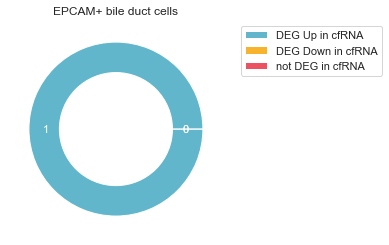

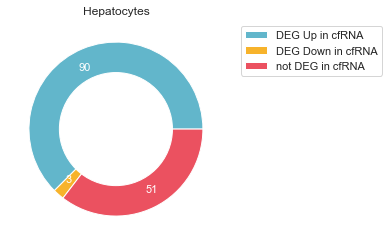

In [15]:
for i in list(inDEGUp.keys())[:-1]:
    cellTypeSpecificLiverGenes = specificLiverSigs[i]

    
    cfGenesInUp = np.intersect1d(cellTypeSpecificLiverGenes,
                                    inDEGUp[i]).tolist()
    cfGenesInDown = np.intersect1d(cellTypeSpecificLiverGenes,
                                      inDEGDown[i]).tolist()
    
    sharedUp = len(cfGenesInUp)
    sharedDown = len(cfGenesInDown)
    notInCF = len(np.setdiff1d(cellTypeSpecificLiverGenes,
                               cfGenesInUp + cfGenesInDown))
    
    

    thisCellTypeName = fullNames[i] 
    
    
    names = 'DEG Up in cfRNA', 'DEG Down in cfRNA' ,'not DEG in cfRNA'
    size = [sharedUp, sharedDown, notInCF]
    my_circle = plt.Circle( (0,0), 0.65, color='white')

    plt.pie(size, colors=['#62B6CB', '#F7B32B','#eb5160'], 
            labels = [sharedUp, sharedDown, notInCF],
            labeldistance = .77,
            textprops={'color':"w"})

    
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(thisCellTypeName)
    plt.legend(names, bbox_to_anchor=(1.05, 1))
    plt.show()
    
    if "Hepatocytes" in i: break
    

In [16]:
save_figure_pdf(p, figSavePath + "hepatocytes_degUpDown_donut" + figEnd)

In [17]:
clear all